# Module 10 Office Hour: Time Series in Python

### Time series vs. cross-sectional data

Time series data is data collected on the same subject at different points in time, such as GDP of a country by year, a stock price of a particular company over a period of time, or your own heartbeat recorded at each second. Any data that you can capture continuously at different time-intervals is a form of time series data.

On the other hand, more conventional datasets which store information at a single point in time, such as information on customers, products, and companies, etc., are known as cross-sectional data. 

A typical real-world dataset is likely to be a hybrid of these formats. For example, we could think of a retailer like Walmart that sells thousands of products every day. If you analyze the sales by product on a particular day, this will be a cross-sectional analysis. You could want to find out what the number 1 selling item on Christmas Eve is for example. Comparatively, if you wanted to find out the sale of one particular item over a period of time (let's say last 5 years), this would be a time-series analysis.

### What is Time Series Forecasting?

Time series forecasting is exactly what it sounds like; predicting unknown values over time. Time series forecasting involves the collection of historical data, preparing it for algorithms to consume, and then predicting the future values based on patterns learned from the historical data.

There are numerous reasons why companies may be interested in forecasting future values, namely GDP, monthly sales, inventory, unemployment, and global temperatures. For example:

- A retailer may be interested in predicting future sales at an SKU (stock keeping unit) level for planning and budgeting.

- A software giant like Google may be interested in knowing the busiest hour of the day or busiest day of the week so that they can schedule server resources accordingly.

### Type of Time Series Forecasting

#### Univariate Forecast

A univariate time series, as the name suggests, is a series with a single time-dependent variable. For example, if you are tracking hourly temperature values for a given region and want to forecast the future temperature using historical temperatures, this is univariate time series forecasting.

Your data may look like this:

<img src="./uni.png" width=200 height=300 />

#### Multivariate Forecast

On the other hand, a Multivariate time series has more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables. This dependency is used for forecasting future values. In this case, you are still forecasting temperature values for the future but now you can use other available information in your forecast as we assume temperature values will be dependent on these factors as well.

Your data may look like this:

<img src="./multi.png" width=400 height=300 />

### Statistical Models

When it comes to time series forecasting using statistical models, there are quite a few popular and well-accepted algorithms. Each of them has different mathematical modalities and they come with a different set of assumptions that must be satisfied. This tutorial will not go in-depth on the mathematical concepts, rather will just give an intuition that you will hopefully find helpful.

### ARIMA

ARIMA is one of the most popular classical methods for time series forecasting. It stands for **autoregressive integrated moving average** and is a type of model that forecasts given time series based on its own past values, that is, its own lags and the lagged forecast errors. 

ARIMA consists of **three** components:

- Autoregression (AR): refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.
- Integrated (I): represents the differencing of raw observations to allow for the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).
- Moving average (MA): incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The "AR" part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior observed) values. The "MA" part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past. The "I" (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). The purpose of each of these features is to make the model fit the data as well as possible.

## Creating a Time Series plot using Pandas (and Matplotlib)

A Time Series plot in **matplotlib** is, in essence, a special case of a line plot. That is, we are plotting x and y points connected by a line, however, the x coordinates represent ``time``.

Let's look at an example:


In [2]:
import pandas as pd 
from dateutil.parser import parse
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)


df.head()

,date,value
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [3]:
# convert the dataframe into a Series, there is only one column
ts = df['value']
ts.head()


1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: value, dtype: int64

<Axes: >

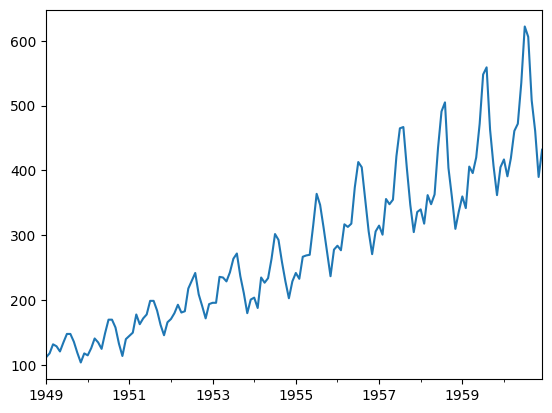

In [4]:
# visualize the time series with a simple line plot using pandas
ts.plot()

## Create a forcasting time series plot using a Seasonal ARIMA model
In the next example, we will use an ARIMA model - AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data. 

Due to the seasonality of Air Travel, we will use an ARIMA model that accounts for Seasonality, named SARIMAX.

We will:
- define the model by analyzing the existing data set
- fit the model
- plot the original data along with the fitted data

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


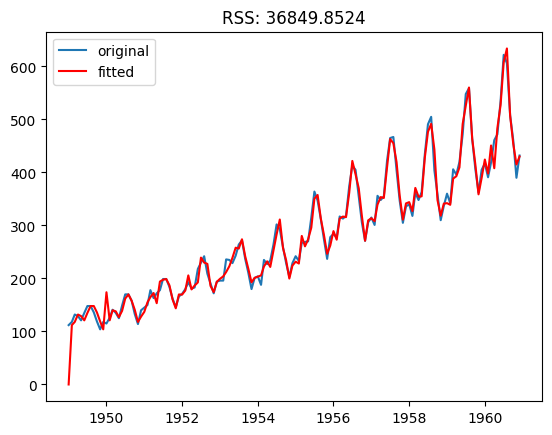

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# include the Seasonal Arima Model for forecasting, SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(ts, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts, label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='fitted')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))
plt.legend()

Now that we have the fitted model, we can plot the original data along with a set of "predicted" data based on a time frame of our choosing:
- for actual data is from 1949 to 1961
- we will "predict" the values from May, 1957 to December, 1960 

In [14]:
#convert our data series back into a dataframe
df = pd.DataFrame(ts)
# Add a forecast column to the dataframe that includes our predictions from the model
df['forecast'] = results_ARIMA.predict(start = '1957-05-01', end= '1960-12-01', dynamic= True)


df.tail()

,value,forecast
1960-08-01,606,545.160558
1960-09-01,508,496.825066
1960-10-01,461,448.836048
1960-11-01,390,413.201537
1960-12-01,432,449.297488


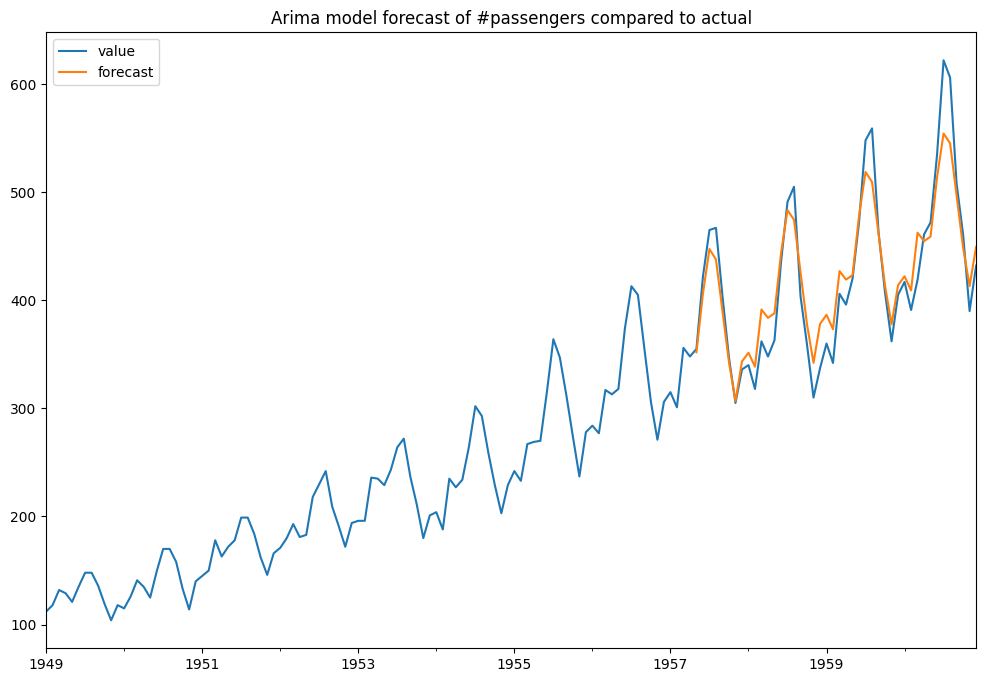

In [15]:
# Plot the Dataframe data 
df[['value', 'forecast']].plot(figsize=(12, 8))
# Add a title
plt.title('Arima model forecast of #passengers compared to actual')
# Show the plot
plt.show()

For fun, this is what the Seasonal forecast would look like until the end of 2020

In [ ]:
pred = results_ARIMA.predict(start = '1960-12-01', end= '2020-12-01', dynamic= True) 
plt.plot(pred, label='prediction')
plt.show()